<a href="https://colab.research.google.com/github/FarukmAliyu/Image-Processing-with-python/blob/main/Copy_of_CNN_Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchviz

In [ ]:
from google.colab import files
uploaded = files.upload()   # pick your JPEG/PNG file

Saving 153976343.jpeg to 153976343 (1).jpeg


In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from torchviz import make_dot

In [ ]:
# Load a pre-trained VGG16 model
model = models.vgg16(pretrained=True)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


100%|██████████| 528M/528M [00:04<00:00, 132MB/s]


In [ ]:
# Transformations for VGG16 input
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [ ]:
from google.colab import files
uploaded = files.upload()   # Choose your file manually

# Use uploaded filename
img_path = list(uploaded.keys())[0]

Saving 153976343.jpeg to 153976343 (2).jpeg


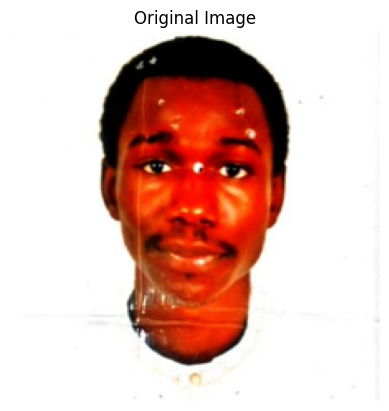

In [ ]:
# Load and preprocess image
img = Image.open(img_path).convert("RGB")
img_t = transform(img)

# Keep a resized copy for display
img_vis = np.array(img.resize((224,224)))

# Add batch dimension for model input
img_var = Variable(img_t.unsqueeze(0), requires_grad=True)

plt.imshow(img_vis)
plt.axis('off')
plt.title("Original Image")
plt.show()

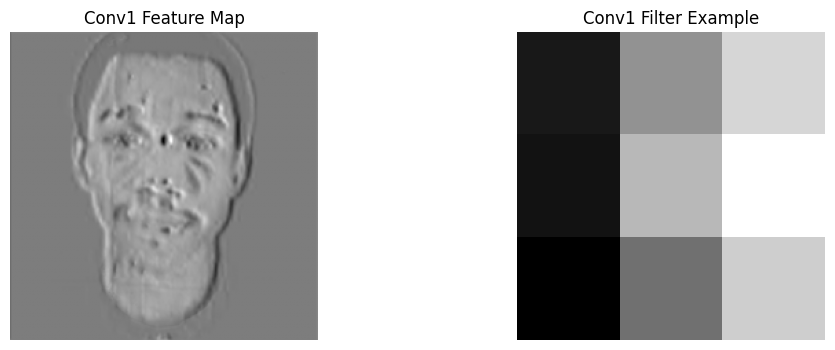

In [ ]:
# First conv layer
conv1 = model.features[0]
y1 = conv1(img_var)
img_conv1 = y1.detach().numpy()
img_conv1 = np.squeeze(img_conv1)

plt.figure(figsize=(12,4))

# Feature map
plt.subplot(1,2,1)
plt.imshow(img_conv1[0], cmap='gray')
plt.axis('off')
plt.title("Conv1 Feature Map")

# Filter weights
weights1 = conv1.weight.detach().numpy()
weights1 = np.squeeze(weights1)
plt.subplot(1,2,2)
plt.imshow(weights1[0,0,:,:], cmap='gray')
plt.axis('off')
plt.title("Conv1 Filter Example")

plt.show()

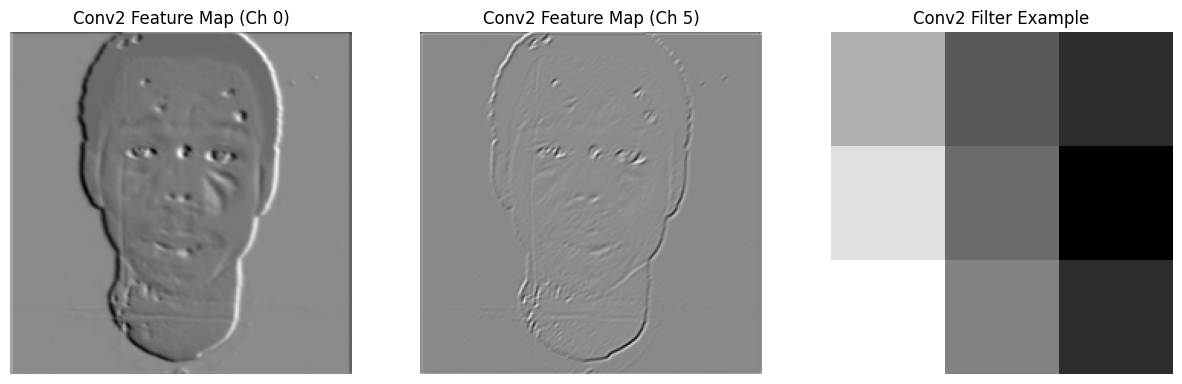

In [ ]:
# Second conv layer
conv2 = model.features[2]
y2 = conv2(y1)
img_conv2 = y2.detach().numpy()
img_conv2 = np.squeeze(img_conv2)

plt.figure(figsize=(15,5))

# Feature map 1
plt.subplot(1,3,1)
plt.imshow(img_conv2[0], cmap='gray')
plt.axis('off')
plt.title("Conv2 Feature Map (Ch 0)")

# Feature map 2
plt.subplot(1,3,2)
plt.imshow(img_conv2[5], cmap='gray')
plt.axis('off')
plt.title("Conv2 Feature Map (Ch 5)")

# Filter weights
weights2 = conv2.weight.detach().numpy()
weights2 = np.squeeze(weights2)
plt.subplot(1,3,3)
plt.imshow(weights2[0,0,:,:], cmap='gray')
plt.axis('off')
plt.title("Conv2 Filter Example")

plt.show()

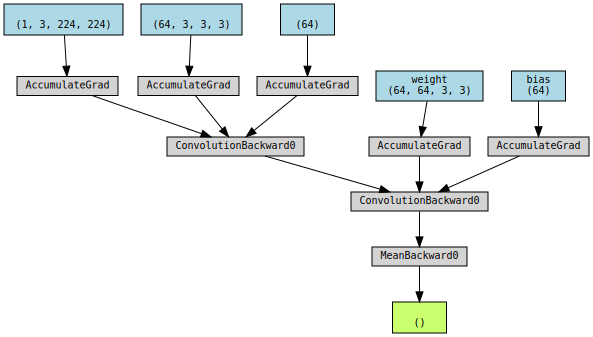

In [ ]:
make_dot(y2.mean(), params=dict(conv2.named_parameters()))